In [77]:
%reload_ext autoreload
%autoreload 2
import pandas as pd

from fastai.vision import untar_data, ImageDataBunch, cnn_learner, accuracy, URLs, get_transforms, imagenet_stats,models
from fastai.vision import load_learner, ImageList, DatasetType

In [2]:
help(ImageDataBunch)

Help on class ImageDataBunch in module fastai.vision.data:

class ImageDataBunch(fastai.basic_data.DataBunch)
 |  ImageDataBunch(train_dl: torch.utils.data.dataloader.DataLoader, valid_dl: torch.utils.data.dataloader.DataLoader, fix_dl: torch.utils.data.dataloader.DataLoader = None, test_dl: Union[torch.utils.data.dataloader.DataLoader, NoneType] = None, device: torch.device = None, dl_tfms: Union[Collection[Callable], NoneType] = None, path: Union[pathlib.Path, str] = '.', collate_fn: Callable = <function data_collate at 0x000002C03C241CA0>, no_check: bool = False)
 |  
 |  DataBunch suitable for computer vision.
 |  
 |  Method resolution order:
 |      ImageDataBunch
 |      fastai.basic_data.DataBunch
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  batch_stats(self, funcs: Collection[Callable] = None, ds_type: fastai.basic_data.DatasetType = <DatasetType.Train: 1>) -> torch.Tensor
 |      Grab a batch of data and call reduction function `func` per channel
 |  
 |  n

# Dogs and cats

## Resnet 34

In [2]:
path = untar_data(URLs.DOGS)
path

WindowsPath('C:/Users/mj514/.fastai/data/dogscats')

In [3]:
?ImageDataBunch.from_folder

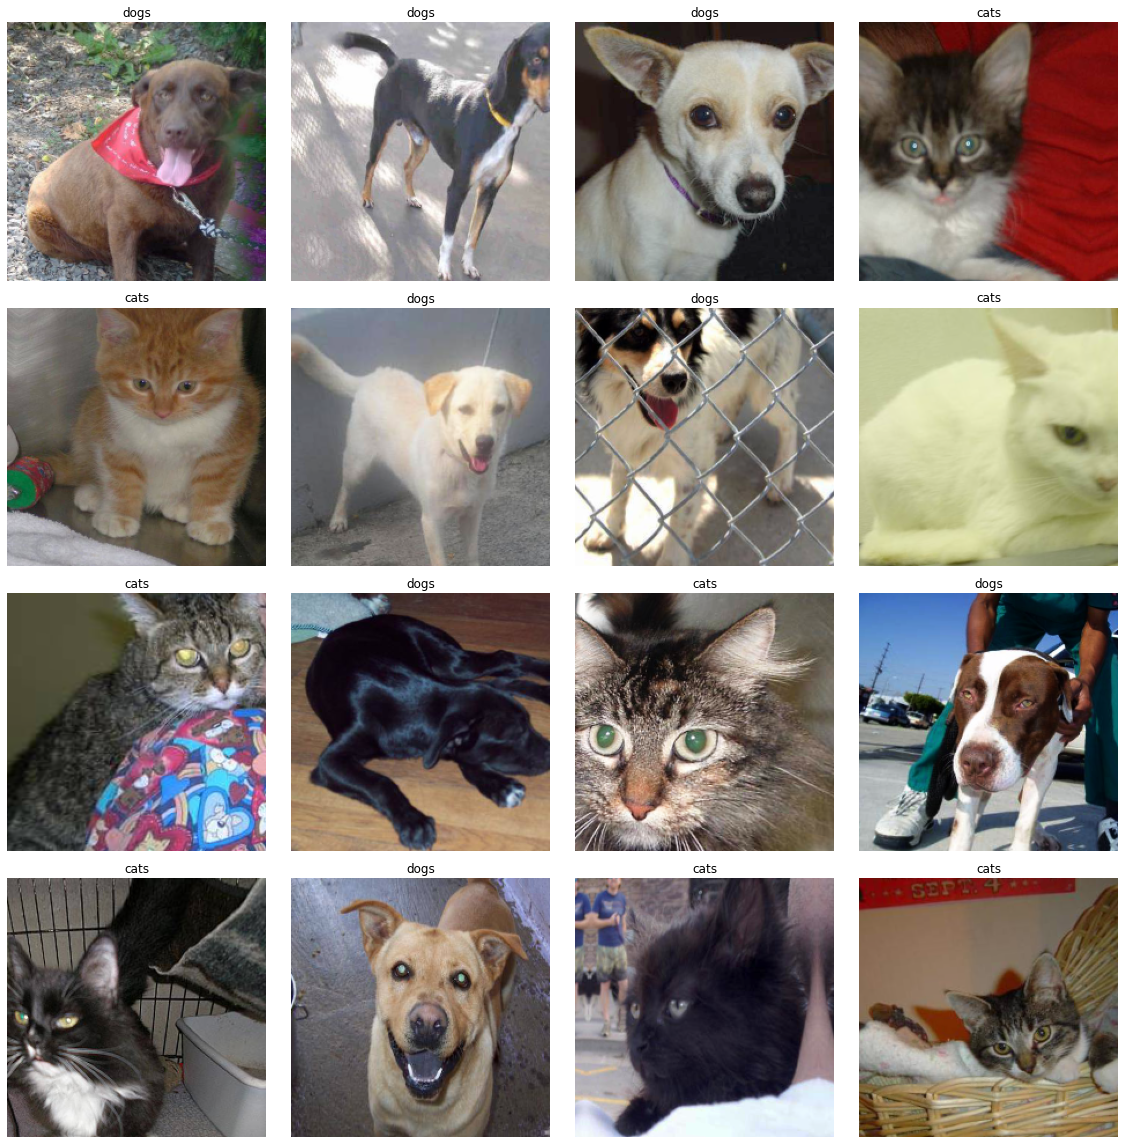

In [31]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, bs = 16, num_workers=4).normalize(imagenet_stats)
data.show_batch(rows=4)

In [32]:
?models

In [33]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.098408,0.040592,0.984000,02:13


In [34]:
learn.unfreeze()

In [35]:
learn.lr_find(stop_div=False, start_lr = 1e-13, end_lr = 1e-1, num_it=200)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 4.47E-13
Min loss divided by 10: 5.62E-14


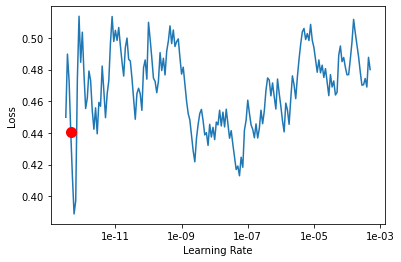

In [29]:
learn.recorder.plot(suggestion=True)

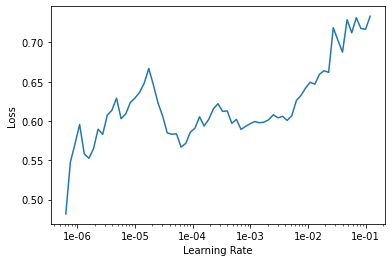

In [15]:
learn.recorder.plot()

In [36]:
learn.unfreeze()
learn.fit_one_cycle(6, slice(1e-9,3e-7), pct_start=0.05)

epoch,train_loss,valid_loss,accuracy,time
0,0.128322,0.046054,0.980000,02:11
1,0.087868,0.040234,0.986000,02:12
2,0.146331,0.039987,0.987000,02:13
3,0.093848,0.037862,0.987000,02:12
4,0.095842,0.040047,0.986000,02:12
5,0.091254,0.039269,0.985500,02:13


In [47]:
learn.export()

In [87]:
image_folder = 'images/'

In [88]:
learn = load_learner(path, test=ImageList.from_folder(image_folder))

C:\Users\mj514\Anaconda3\envs\fastAI2\lib\site-packages\torch\nn\functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


In [89]:
preds,y = learn.get_preds(ds_type=DatasetType.Test)

In [114]:
predList = list(preds.numpy()[:,0])

In [115]:
from os import listdir
f_names = listdir(image_folder)

In [117]:
pred_df = pd.DataFrame(list(zip(f_names,predList)), columns = ['f_name','prob_dog'])

In [96]:
registry = 'registry/downloaded_files.csv'
regDF = pd.read_csv(registry)

In [122]:
def get_file(aString):
    return str(aString.split('/')[-1])
regDF['f_name'] = regDF.file.apply(get_file)

In [127]:
out_df = pd.merge(regDF,pred_df, on = ['f_name'])

In [131]:
out_df.to_csv(f'registry/cat_dog_pred.csv', index = False)